In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_selected = df[features + ['Survived']]


In [7]:
df_selected = df[features + ['Survived']].copy()  # Make a proper copy

from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
df_selected.loc[:, 'Sex'] = le_sex.fit_transform(df_selected['Sex'])

df_selected.loc[:, 'Embarked'] = df_selected['Embarked'].fillna('S')
le_embarked = LabelEncoder()
df_selected.loc[:, 'Embarked'] = le_embarked.fit_transform(df_selected['Embarked'])


In [8]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


In [10]:
df_cleaned = df_selected.copy()
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].mean())
df_cleaned['Fare'] = df_cleaned['Fare'].fillna(df_cleaned['Fare'].mean())
# Optional: drop Cabin if you're not using it
df_cleaned = df_cleaned.drop('Cabin', axis=1, errors='ignore')

X_pca = pca.fit_transform(df_cleaned.drop('Survived', axis=1))


In [13]:
from sklearn.model_selection import train_test_split
X = df_selected.drop('Survived', axis=1)
y = df_selected['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5)


In [15]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, roc_auc_score,
    mean_squared_error, r2_score
)
y_pred = model.fit(X_train, y_train).predict(X_test)

# Classification
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# ROC & AUC
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Regression metrics (if needed)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


Confusion Matrix:
 [[89 16]
 [18 56]]
Accuracy: 0.8100558659217877
Precision: 0.7777777777777778
Recall: 0.7567567567567568
F1 Score: 0.7671232876712328
MSE: 0.18994413407821228
RMSE: 0.43582580703557733
R² Score: 0.2167310167310167


E:\ML\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


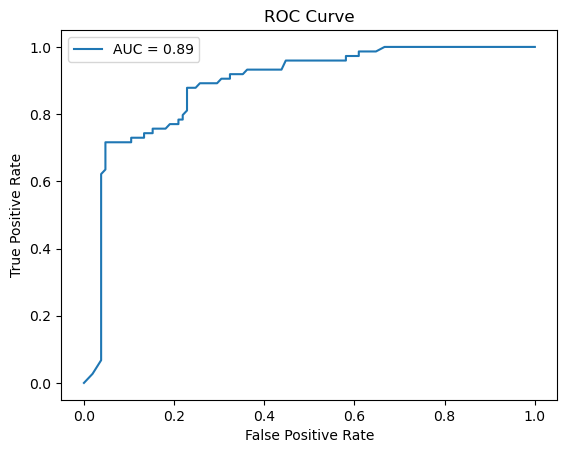

In [16]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
